# Using Prophet for S&P 500 forcasting

In [31]:
## Prophet docs can be found here: https://facebook.github.io/prophet/docs/quick_start.html

In [32]:
## This notebooks is published here: https://deepnote.com/publish/e870766e-a2ca-4167-99b6-3cb070a87c2e

In [8]:
import pandas as pd
import numpy as np
import datetime

import quandl

import statsmodels.api as sm
from prophet import Prophet

import matplotlib.pyplot as plt

import pandas_datareader.data as web
import datetime


In [11]:
start = datetime.datetime(1960, 1, 1)
end = pd.to_datetime('today')

#SP500 = quandl.get("MULTPL/SP500_REAL_PRICE_MONTH",start_date = start,end_date = end)
SP500=web.DataReader('^GSPC', 'yahoo', start, end)
SP500

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1960-01-04,59.910000,59.910000,59.910000,59.910000,3990000,59.910000
1960-01-05,60.389999,60.389999,60.389999,60.389999,3710000,60.389999
1960-01-06,60.130001,60.130001,60.130001,60.130001,3730000,60.130001
1960-01-07,59.689999,59.689999,59.689999,59.689999,3310000,59.689999
1960-01-08,59.500000,59.500000,59.500000,59.500000,3290000,59.500000
...,...,...,...,...,...,...
2022-09-26,3715.669922,3644.760010,3682.719971,3655.040039,4886140000,3655.040039
2022-09-27,3717.530029,3623.290039,3686.439941,3647.290039,4577740000,3647.290039
2022-09-28,3736.739990,3640.610107,3651.939941,3719.040039,4684850000,3719.040039


In [12]:
df = SP500
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1960-01-04,59.910000,59.910000,59.910000,59.910000,3990000,59.910000
1960-01-05,60.389999,60.389999,60.389999,60.389999,3710000,60.389999
1960-01-06,60.130001,60.130001,60.130001,60.130001,3730000,60.130001
1960-01-07,59.689999,59.689999,59.689999,59.689999,3310000,59.689999
1960-01-08,59.500000,59.500000,59.500000,59.500000,3290000,59.500000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15795 entries, 1960-01-04 to 2022-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       15795 non-null  float64
 1   Low        15795 non-null  float64
 2   Open       15795 non-null  float64
 3   Close      15795 non-null  float64
 4   Volume     15795 non-null  int64  
 5   Adj Close  15795 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 863.8 KB


In [18]:
df['ds'] = df.index
df['y'] = df['Close']

In [19]:
df

,High,Low,Open,Close,Volume,Adj Close,ds,Date,y
Date,,,,,,,,,
1960-01-04,59.910000,59.910000,59.910000,59.910000,3990000,59.910000,1960-01-04,1960-01-04,59.910000
1960-01-05,60.389999,60.389999,60.389999,60.389999,3710000,60.389999,1960-01-05,1960-01-05,60.389999
1960-01-06,60.130001,60.130001,60.130001,60.130001,3730000,60.130001,1960-01-06,1960-01-06,60.130001
1960-01-07,59.689999,59.689999,59.689999,59.689999,3310000,59.689999,1960-01-07,1960-01-07,59.689999
1960-01-08,59.500000,59.500000,59.500000,59.500000,3290000,59.500000,1960-01-08,1960-01-08,59.500000
...,...,...,...,...,...,...,...,...,...
2022-09-26,3715.669922,3644.760010,3682.719971,3655.040039,4886140000,3655.040039,2022-09-26,2022-09-26,3655.040039
2022-09-27,3717.530029,3623.290039,3686.439941,3647.290039,4577740000,3647.290039,2022-09-27,2022-09-27,3647.290039
2022-09-28,3736.739990,3640.610107,3651.939941,3719.040039,4684850000,3719.040039,2022-09-28,2022-09-28,3719.040039


In [20]:
m = Prophet()
m.fit(df)

09:52:26 - cmdstanpy - INFO - Chain [1] start processing
09:52:51 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future = m.make_future_dataframe(periods=1825)
future.tail()

,ds
17615,2027-09-25
17616,2027-09-26
17617,2027-09-27
17618,2027-09-28
17619,2027-09-29


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
17615,2027-09-25,5248.521837,4779.444781,5825.074365
17616,2027-09-26,5248.679328,4775.622024,5799.211934
17617,2027-09-27,5246.342880,4773.457729,5827.190606
17618,2027-09-28,5247.156866,4800.381042,5823.564385
17619,2027-09-29,5247.542703,4815.556065,5824.921157


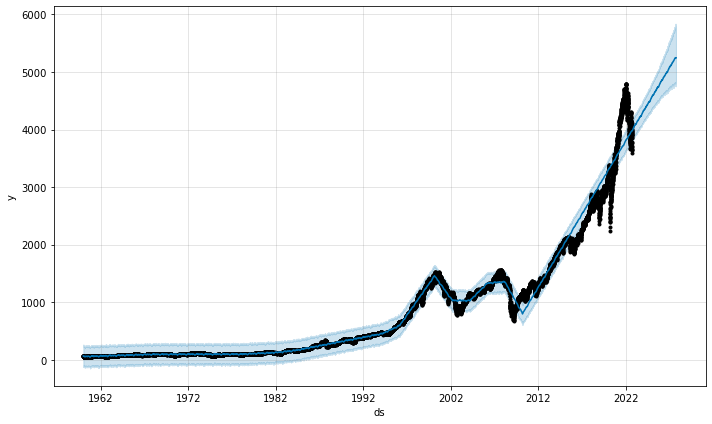

In [27]:
fig1 = m.plot(forecast)

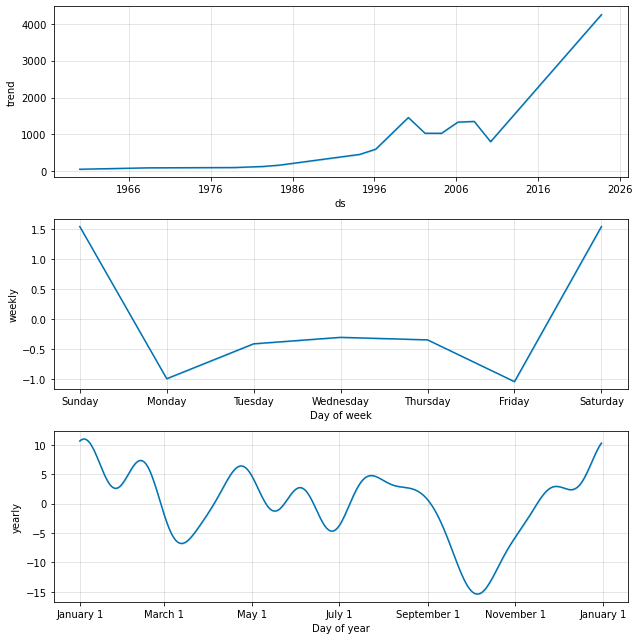

In [24]:
fig2 = m.plot_components(forecast)